In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [16]:
df = pd.read_csv("HomePrice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


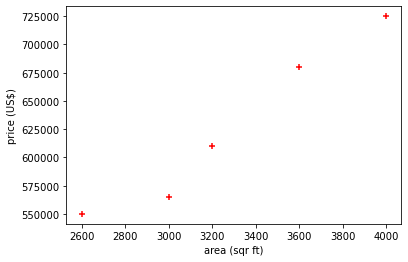

In [12]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [18]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [19]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [20]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [21]:
reg.predict([[3300]])

array([628715.75342466])

In [22]:
reg.coef_

array([135.78767123])

In [23]:
reg.intercept_

180616.43835616432

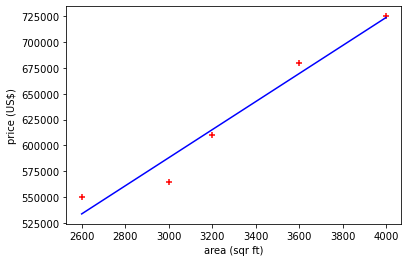

In [35]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

#### Y = m * X + b (m is coefficient and b is intercept)

In [24]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

#### (1) Predict price of a home with area = 5000 sqr ft

In [26]:
reg.predict([[5000]])

array([859554.79452055])

#### Generate CSV file with list of home price predictions

In [27]:
area_df = pd.read_csv("homes.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [29]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [30]:
#make a new column
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [32]:
area_df.to_csv("prediction.csv",index=False)